In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [43]:
car_raw = pd.read_csv('Car_Raw_Data.csv')
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Ham veriyi önişleme

In [44]:
car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [45]:
car_raw.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [46]:
car_raw.drop("Model", axis=1, inplace=True)
car_raw.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Ham verideki eksik değerleri tespit etme

In [47]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [48]:
car_raw.dropna(inplace=True)
car_raw.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Olasılık Dağılımlarını Keşfetme

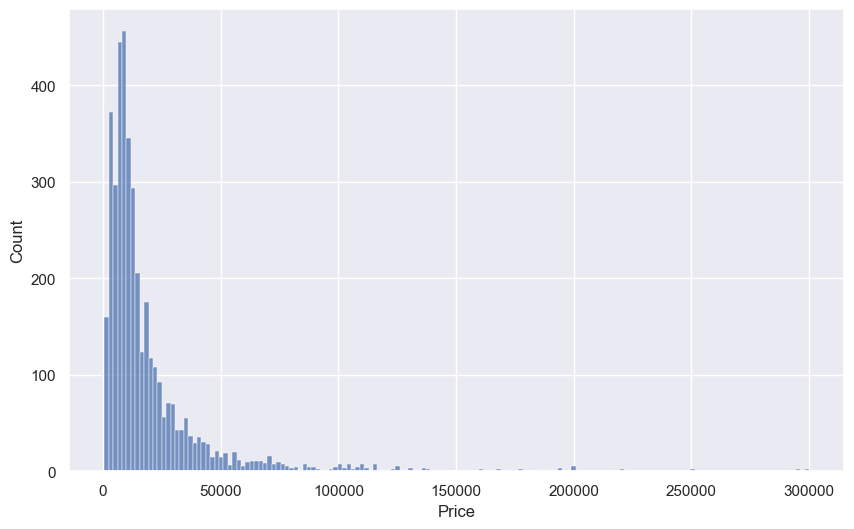

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(car_raw['Price'])
plt.show()

Veri seti içinde yer alan fiyat aralığını kontrol ettiğimizde değerlerin bir düzene göre sıralandığını görüyoruz. Ancak düzene uymayan bazı değerler mevcut bunun için quantile(0.99) ile %1'ini kaldırıyoruz

In [50]:
q = car_raw['Price'].quantile(0.99)
q

129812.51999999981

burda tespit edilen değerin üzerindeki verileri kullanmayı tercih etmiyoruz

In [51]:
car_1 = car_raw[car_raw['Price'] < q]
car_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


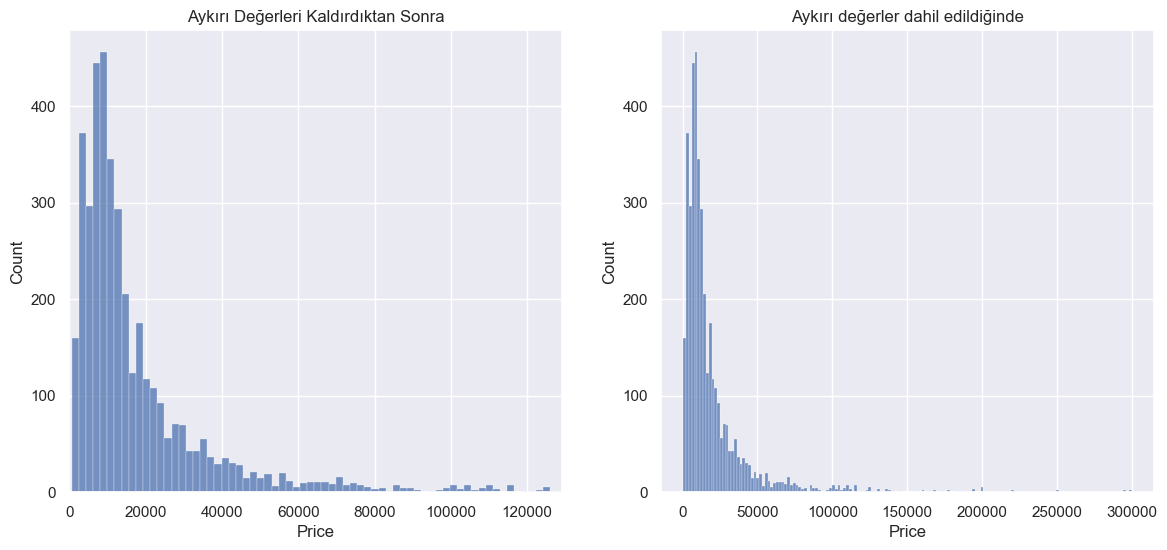

In [52]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(car_raw['Price']);
plt.title('Aykırı Değerleri Kaldırdıktan Sonra');
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.histplot(car_raw['Price']);
plt.title('Aykırı değerler dahil edildiğinde');

In [53]:
q = car_1['Mileage'].quantile(0.99)
car_2 = car_1[car_1['Mileage'] < q]

Burada gerçekleştirdiğimiz işlem sayesinde ortalamanın anormal üstündeki verilerden kurtulmuş oluyoruz. Benzer işlemler Katedilen mesafe, motor hacmi ve yıl için de geçerli olabilir.

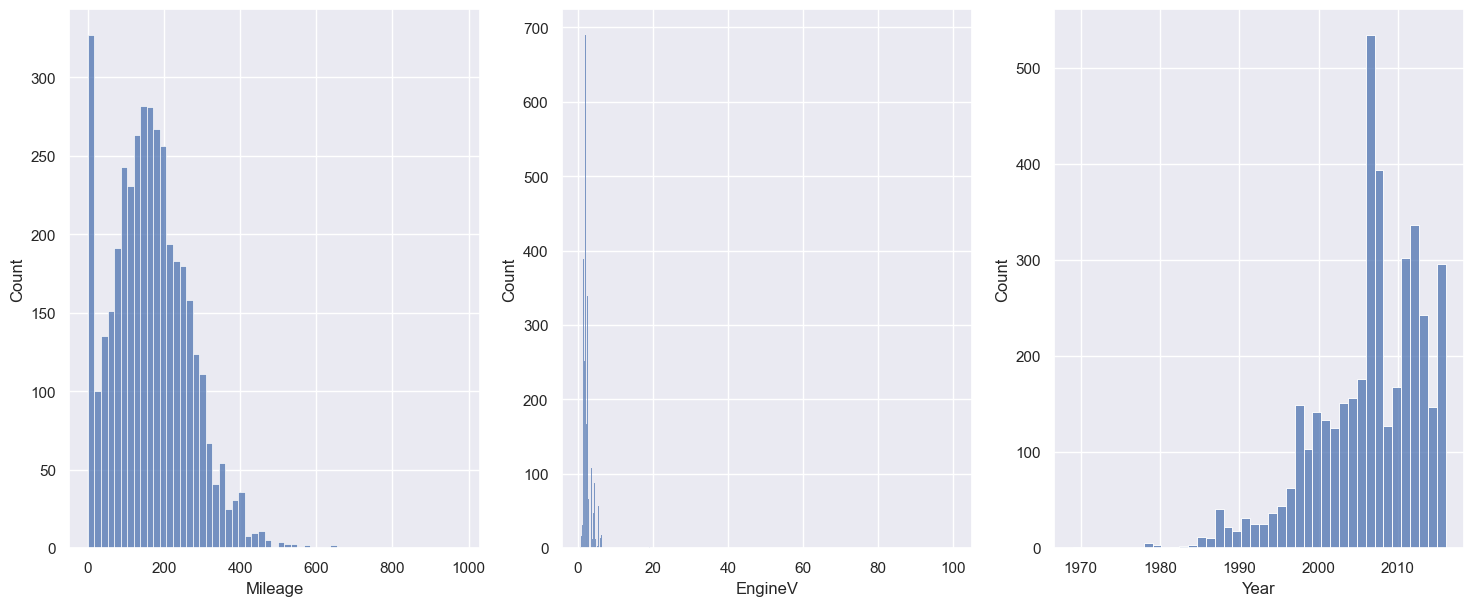

In [54]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(car_1['Mileage']);

plt.subplot(1,3,2)
sns.histplot(car_raw['EngineV'])

plt.subplot(1,3,3)
sns.histplot(car_raw['Year']);

Benzer Problemi burada da gözlemliyoruz. Mesafe ve Motor hacminde ortalamanın çok üstünde olanlar ve yıl olarak aşırı eski araçlar veride sapmalara neden oluyor. Benzer çözüm deneyerek bu sorunu da aşmaya çalışıyoruz.

### Katedilen Mesafe

In [57]:
q = car_1["Mileage"].quantile(0.99)
car_2 = car_1[car_1["Mileage"] < q]

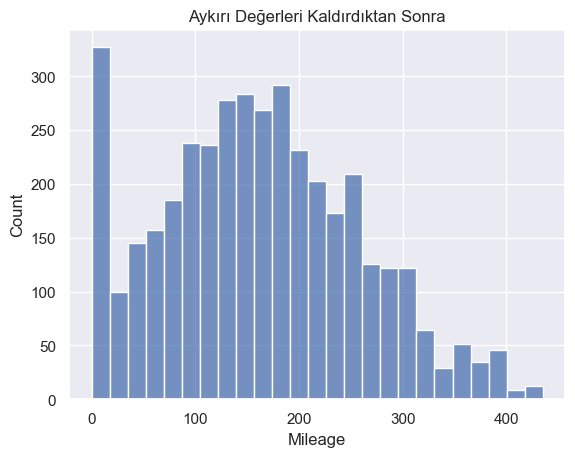

In [58]:
sns.histplot(car_2['Mileage']);
plt.title('Aykırı Değerleri Kaldırdıktan Sonra');

### Motor Hacmi

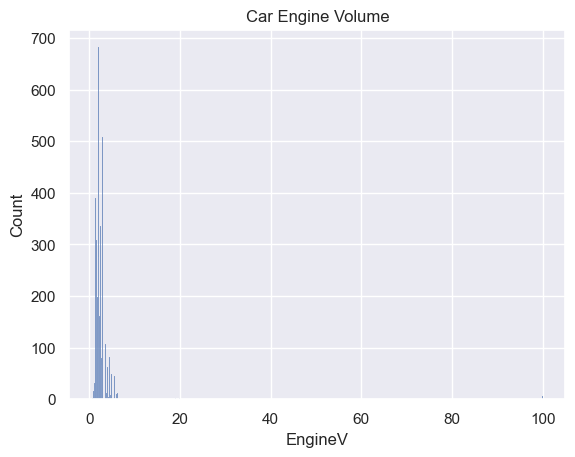

In [59]:
sns.histplot(car_2['EngineV']);
plt.title('Car Engine Volume');

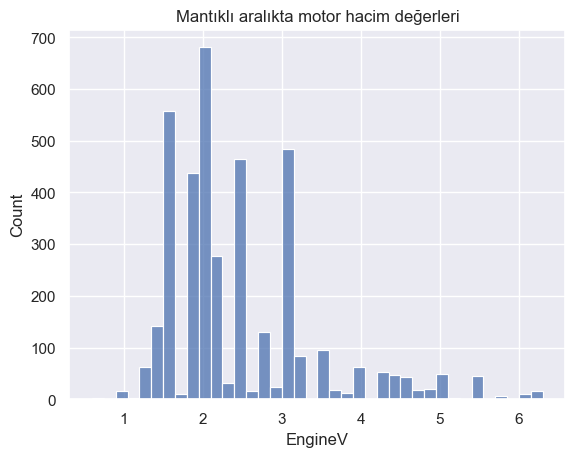

In [61]:
car_3 = car_2[car_2['EngineV']<6.5]
sns.histplot(car_3['EngineV']);
plt.title('Mantıklı aralıkta motor hacim değerleri');

### Yıl

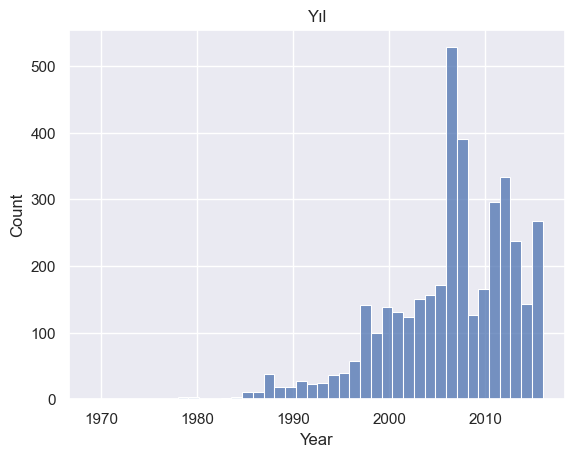

In [63]:
sns.histplot(car_3['Year']);
plt.title('Yıl');

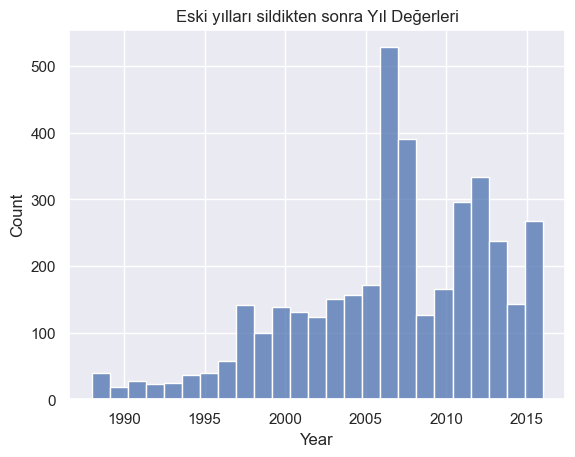

In [65]:
q = car_3['Year'].quantile(0.01);
car_4 = car_3[car_3['Year']>q]

sns.histplot(car_4['Year']);
plt.title('Eski yılları sildikten sonra Yıl Değerleri');

In [66]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


yaptığımız işlemler sonucunda indexlerde kaymalar yaşandı. veri setinde 3867 veri bulunurken 4344 index yer alıyor.

In [67]:
car_clean = car_4.reset_index(drop=True)

car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [68]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
car_raw.shape[0] -  car_clean.shape[0]

158

veri setinin ilk hali ile temizlenmiş hali arasında başta sildiğimiz null değerler haricinde 158 veri daha kaldırmışız.
silinen 172 null verisini de dahil edersek toplam 330 adet datayı kaybettik

In [ ]:
car_clean.to_csv('Car_cleaned.csv', index=False)

Temizlik işlemleri sonrasında dahmin için öncelikle Lineer Regresyon kullanmayı deniyoruz.

Lineer Regresyonun amacı iki değişken arasındaki ilişkinin doğrusal olup olmadığını tahmin etmektir.

In [70]:
car = pd.read_csv('Car_cleaned.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


numerik 3 sütunu inceleyelim

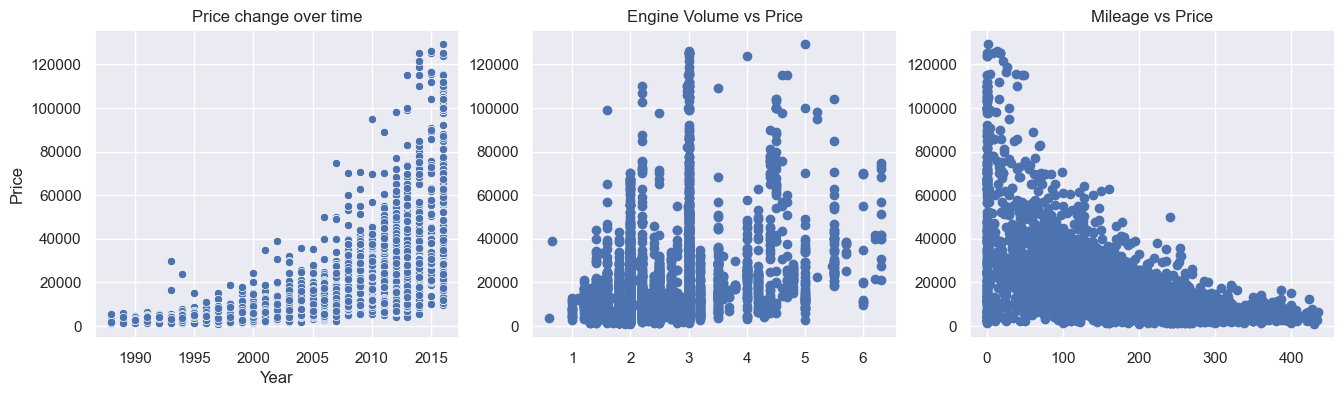

In [71]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=car["Year"], y=car["Price"])
plt.title("Price change over time")
plt.subplot(1,3,2)
plt.scatter(x=car["EngineV"], y=car["Price"])
plt.title("Engine Volume vs Price")
plt.subplot(1,3,3)
plt.scatter(x=car["Mileage"], y=car["Price"])
plt.title("Mileage vs Price")
plt.show()

ilişki doğrusal olmadığını gözlemledik. Bu yüzden Lineer Regresyon kullanımına uygun olmadığını tespit ediyoruz

Text(0.5, 1.0, 'Price')

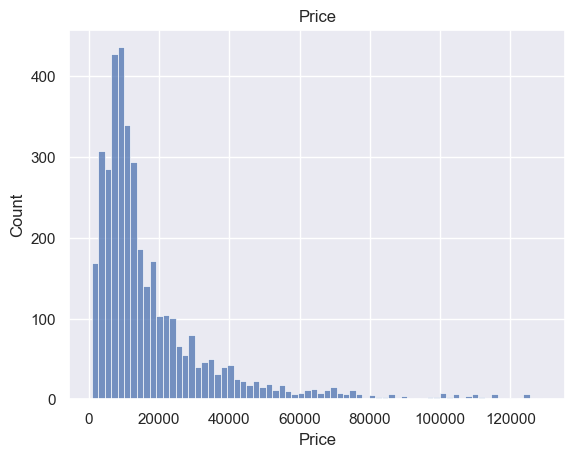

In [77]:
sns.histplot(car['Price']);
plt.title('Price')

Burda temel sorun fiyat parametresinden kaynaklanıyor. Sahip olduğumuz fiyat verisi doğrusal değil.

Veriyi dönüştürmek için log dönüşümü deniyoruz

In [78]:
log_price = np.log(car['Price'])
car['log_price'] = log_price

car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


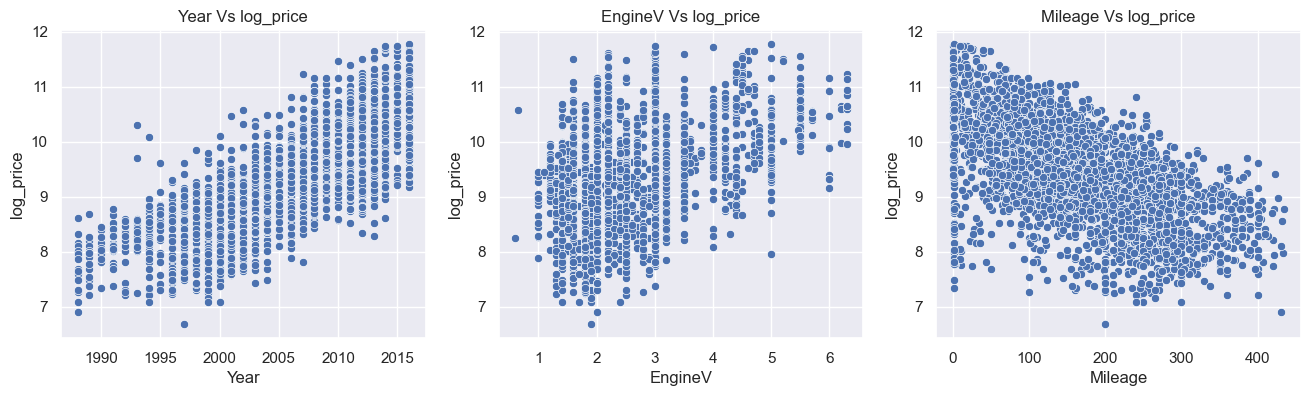

In [79]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price']);
plt.title('Year Vs log_price');

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price']);
plt.title('EngineV Vs log_price');

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price']);
plt.title('Mileage Vs log_price');

log dönüşümü sonrası verilerin doğrusallığını gözlemleyebiliyoruz.

In [81]:
car.drop('Price', axis=1, inplace=True)

orijinal fiyat tablosuna ihtiyacımız kalmadığı için kaldırabiliriz.

Şimdi sıra çoklu doğrusallığı kontrol etmeye geldi

In [82]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

Burada, arabanın daha yeni olması kilometre değerinin daha düşük olacağı gibi varsayılabilecek verilerde bazı çoklu doğrusallık olabilir. bu nedenle Yıl ve Kilometre birbiriyle ilişkili olacaktır

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

var = car[['Mileage','Year', 'EngineV']]
vif_df = pd.DataFrame()

vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['Features'] = var.columns
vif_df

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Sonuç 1 olduğunda, bu çoklu bağlantı bulunmadığı anlamına gelir, bu aynı zamanda ölçünün minimum değeridir. ancak bunun bir üst sınırı yoktur.

Genel olarak değerler 1 ila 5 arasında veya 1 < VIF < 5 arasında kabul edilebilir olmakla birlikte, mevcut soruna ve yazılımcıya bağlıdır. geçmiş deneyimlerinden yola çıkarak kesme değerine karar verecektir

Elde ettiğimiz sonuça göre, Yıl sütunu diğer sütunlarla çok fazla ilişkili gibi görünüyor. ve diğer özellik değerlerini de etkilemektedir. yıl değerini çıkarmak iyi olabilir.

In [85]:
car.drop('Year', axis=1, inplace=True)
car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


Sıra kategorik sütunlara geliyor

In [86]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


Bunun için pandas .get_dummies() metodunu tercih ediyoruz, tüm kategorik değerler için yeni bir sütun oluşturacak, verilerin boyutunu artıracaktır.

In [87]:
car_dum = pd.get_dummies(car, drop_first=True)
car_dum = car_dum.astype(float)
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163.0,2.5,9.350102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,35.0,1.6,9.792556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,9.0,3.0,11.736069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,1.0,3.5,8.779557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Çoklu bağlantı durumu kontrol

In [88]:
vif_df_all = pd.DataFrame()

vif_df_all['VIF'] = [vif(car_dum.values, i) for i in range(car_dum.shape[1])]
vif_df_all['Features'] = car_dum.columns

vif_df_all

,VIF,Features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


Elde ettiğimiz sonuç olumlu. tüm değerler 5'in altında ancak log_price yani hedef sütunumuz 42 VIF değerine sahip, bu da bize fiyatın diğer sütunlarla yüksek oranda ilişkili olduğunu söylüyor

In [89]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [90]:
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

car_pos = car_dum[col]
car_pos

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163.0,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,9.792556,35.0,1.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,11.736069,9.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,8.779557,1.0,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [91]:
car_pos.to_csv('Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


In [92]:
car = pd.read_csv('Car_preproccesed.csv')
car.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# **Linear Reg**

In [93]:
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))

Verilerin ölçeklendirilmesi
Not: Dummy variable'ı ölçeklendirmek her zaman en iyi uygulama olarak kabul edilmez. Çünkü ölçeklendirildiklerinde tüm bilgileri kaybederler. ancak burada bunu göz ardı ediyoruz ve her sütunun ayrı özellikler olduğunu düşünüyoruz.

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [95]:
X_scaled[0]

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

Dummy değerlerde yer alan 1 ve 0'lar artık yok

#### Train_test_split

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

#### Regresyon oluşturma

In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

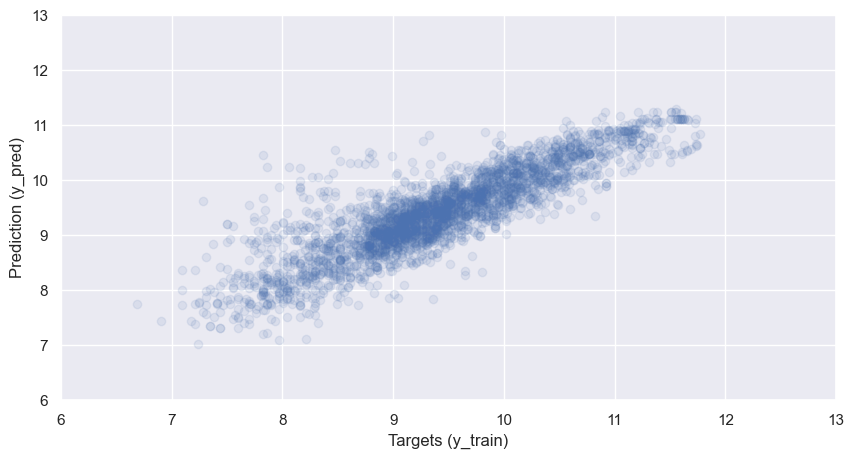

In [99]:
# Temel Lineer regresyon modelininin değerlendirmesi
y_pred_train = lr.predict(X_train)
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Eğitim tahmini iyi görünüyor, tamamen rastgele değil, grafikte doğrusallığı gözlemlenebiliyor

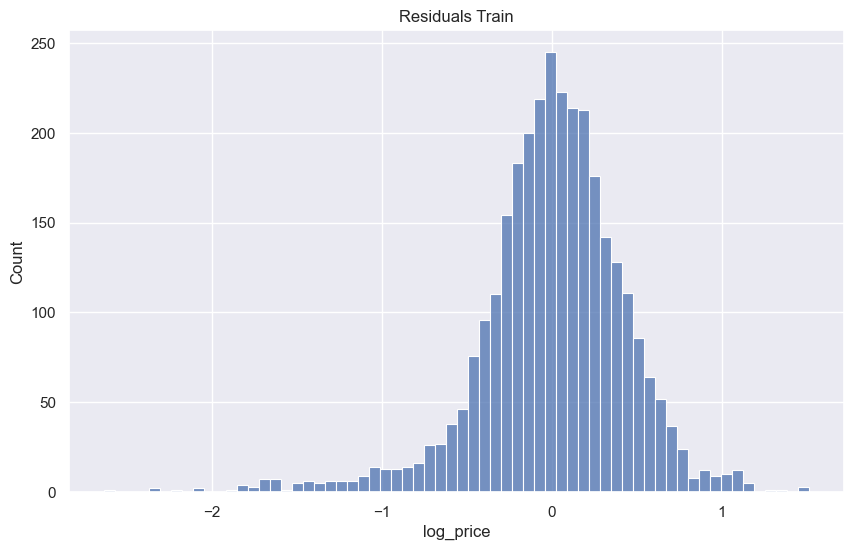

In [101]:
residuals_train = (y_train - y_pred_train)

plt.figure(figsize=(10,6))
sns.histplot(residuals_train)
plt.title('Residuals Train')
plt.show()

Bu grafikten, ortalama 0 olduğu için değerlerin çoğunun 0'a yakın olduğu gözlemlenebilir, bu da modelin daha iyi çalıştığı anlamına gelir, çünkü farkın çoğu 0'dır, model hedef değer üzerinde olduğu için tahmin yapar.

In [102]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7572893585761237

In [103]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

10165.941028678855

Veri setinde minimum ve maksimum fiyat 800 ve 129222 idi ve modelimiz 10165 hata yapıyor.

Oluşturduğum model mükemmel değil ama o kadar da kötü değil.

In [104]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lr.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462515
1,EngineV,0.213625
2,Brand_BMW,0.025071
3,Brand_Mercedes-Benz,0.023430
4,Brand_Mitsubishi,-0.128286
5,Brand_Renault,-0.174282
6,Brand_Toyota,-0.048213
7,Brand_Volkswagen,-0.077236
8,Body_hatch,-0.147790
9,Body_other,-0.103041


positive_weights = özellik değeri arttıkça fiyat da artacaktır.

negatif_ağırlıklar = özellik değeri artar ancak fiyat düşer

### Test Verilerinin Değerlendirmesi

Text(0, 0.5, 'Prediction (y_pred)')

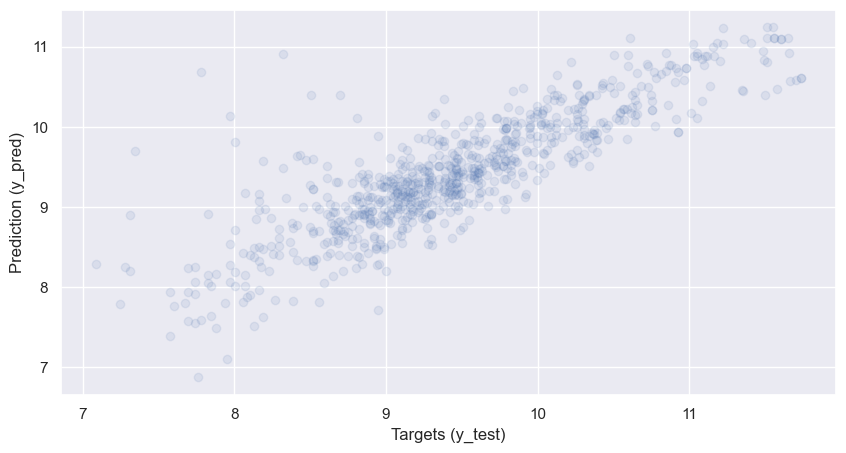

In [105]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred)')

In [106]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

11692.288211748422

Test verilerinde 11692 hata yapıyor, bu da modelin o kadar iyi performans gösteremeyebileceğini, ancak deneme ve test verilerinde aynı şekilde davrandığı için aşırı uyum göstermediğini söylüyor

In [108]:
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)
df_eval

,Prediction,Target
0,18328.250265,19000.0
1,5256.283391,5500.0
2,22185.025441,19200.0
3,10102.190466,11900.0
4,4000.490570,7750.0
...,...,...
769,39166.491984,116500.0
770,6060.759191,13200.0
771,15649.805091,27500.0
772,11164.302749,16500.0


In [109]:
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

,Prediction,Target,Residual,Difference%
0,18328.250265,19000.0,671.749735,3.535525
1,5256.283391,5500.0,243.716609,4.431211
2,22185.025441,19200.0,-2985.025441,15.547008
3,10102.190466,11900.0,1797.809534,15.107643
4,4000.490570,7750.0,3749.509430,48.380767
...,...,...,...,...
769,39166.491984,116500.0,77333.508016,66.380694
770,6060.759191,13200.0,7139.240809,54.085158
771,15649.805091,27500.0,11850.194909,43.091618
772,11164.302749,16500.0,5335.697251,32.337559


In [110]:
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16194.846830,18602.017829,2407.171000,39.109058
std,13265.843148,20139.559184,11449.213563,97.373331
min,964.002758,1200.000000,-50811.547159,0.101011
25%,7763.585673,7500.000000,-1827.305347,11.626478
50%,11715.376533,11900.000000,499.370435,22.999212
75%,20275.681146,20999.060000,3512.480615,39.073044
max,76339.579559,125000.000000,84484.674575,1715.173190


In [112]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
411,22477.27,22500.00,22.73,0.10
633,12913.53,12900.00,-13.53,0.10
437,10818.26,10800.00,-18.26,0.17
522,23245.83,23200.00,-45.83,0.20
91,11525.19,11500.00,-25.19,0.22
589,7028.32,6999.00,-29.32,0.42
664,61761.13,61500.00,-261.13,0.42
446,9252.34,9200.00,-52.34,0.57
322,9239.70,9300.00,60.30,0.65
119,14901.42,15000.00,98.58,0.66


Buradaki not, daha yüksek farkın daha düşük fiyatlı arabada olduğudur. görebildiğim gibi residual'ların hepsi negatif. modelin orijinal değerden çok uzakta tahmin edildiği anlamına gelir. Residual PDF grafiğinde gözlemlediğim gibi kuyruk negatif taraftaydı. bu bunun daha tablosal versiyonudur.

Bu bana arabanın fiyatının daha düşük olduğunu ama modelimin daha yüksek olacağını düşündüğü bir şeyi kaçırdığımı söylüyor.

Bunun nedeni ilk aşamada kaldırdığım Model sütunu olabilir. ya da belki araba bozuktur ama bu bilgiye sahip değilim.

Sıradaki aşama başka bir model oluşturmak ve Model Sütununu tutmak

In [113]:
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


Şimdi her kategori sütunu için kategori etiketi için dummy numaralarını girmek için sözlük oluşturacağım. 
Daha sonraki aşamada web uygulaması oluşturma sırasında kullanılacak

In [114]:
brand_dict = dict()
body_dict = dict()
engine_type_dict = dict()
registration_dict = dict()
model_dict = dict()

In [117]:
# Yalnızca kategorik sütunlar
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dict[lbl] = num
print('Brand Label saved')

car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dict[lbl] = num
print('Body Label saved')

car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dict[lbl] = num
print('Engine Type Label saved')

car['registration_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dict[lbl] = num
print('Registration Label saved')

car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dict[lbl] = num
print('Model Label saved')

car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)
car_2.head()

Brand Label saved
Body Label saved
Engine Type Label saved
Registration Label saved
Model Label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,registration_enc,model_enc
0,4200.00,277,2.00,1991,1,3,3,1,17
1,7900.00,427,2.90,1999,2,5,0,1,248
2,13300.00,358,5.00,2003,2,3,1,1,222
3,23000.00,240,4.20,2007,0,0,3,1,211
4,18300.00,120,2.00,2011,5,0,3,1,214


Şimdi bilindiği gibi, ağaç tabanlı modeller oldukça etkilidir ve ayrıca Random Forest yaklaşımı son derece etkilidir ve en çok kullanılan makine öğrenimi algoritmalarının başında gelir. en önemli avantajı, daha uzun veri ön işleme gerektirmemesi ve aynı zamanda daha iyi sonuç vermesidir.

In [118]:
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor()
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [121]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
y_pred_train = rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE on Train data: {rmse_train}')

RMSE on Train data: 2024.5949130426575


In [123]:
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'RMSE on Test data: {rmse_test}')

RMSE on Test data: 5000.450831032567


In [124]:
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print(f'Training Score: {r2_score(y_train, y_pred_train)}')

Training Score: 0.9884172909999721


In [125]:
y_pred_test = rf_1.predict(X_test)

print(f'Testing Score: {r2_score(y_test, y_pred_test)}')

Testing Score: 0.9382723322537116


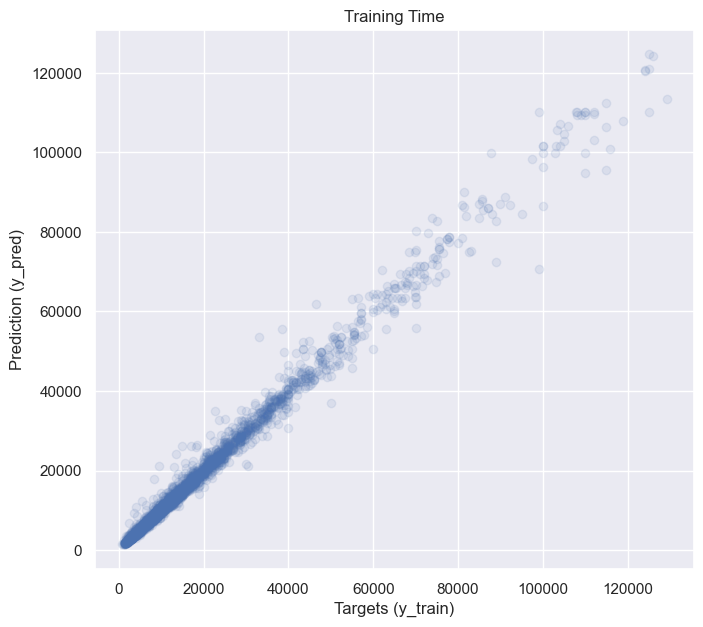

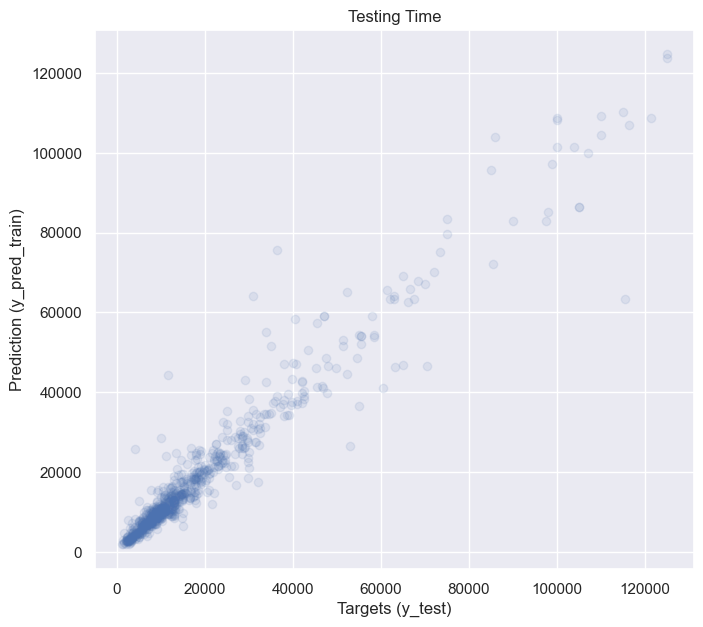

In [126]:
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.1)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_pred)')
plt.title('Training Time')
plt.show()

plt.figure(figsize=(17,7))
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.1)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_pred_train)')
plt.title('Testing Time');
plt.show()

#### Baz model için Residual kontrolü

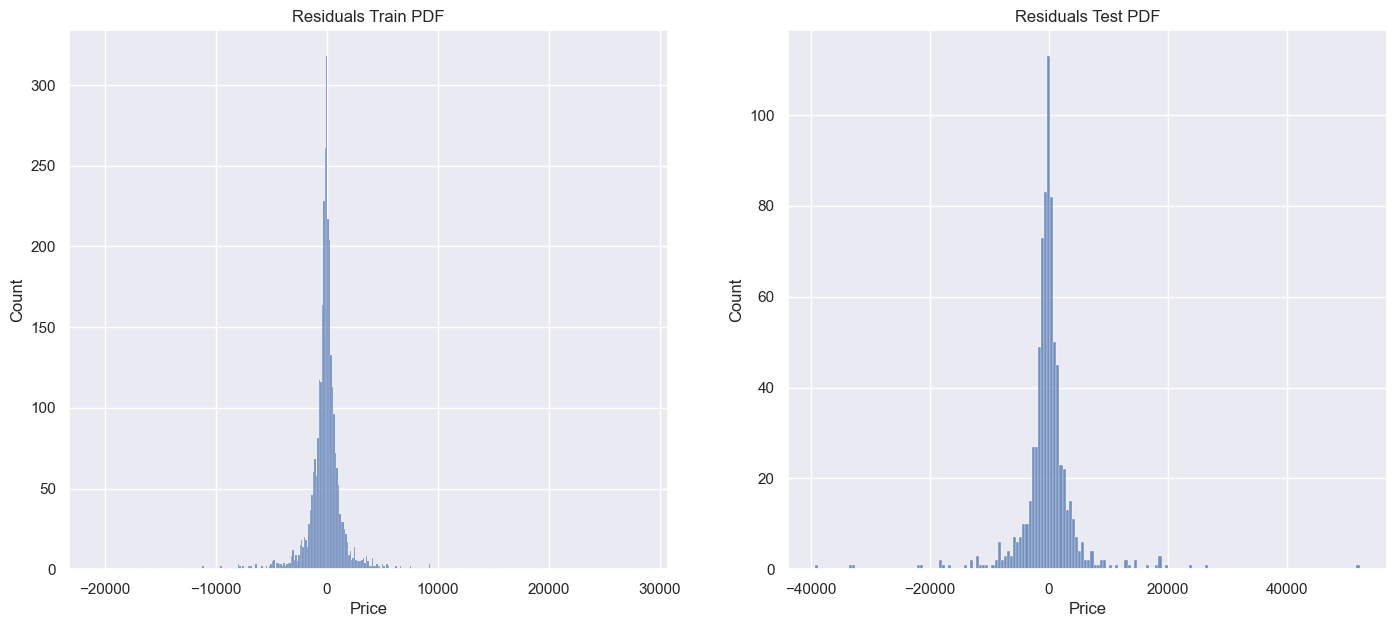

In [127]:
residuals_train = (y_train - rf_1.predict(X_train))
residuals_test = (y_test - rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residuals_train)
plt.title('Residuals Train PDF')

plt.subplot(1,2,2)
sns.histplot(residuals_test)
plt.title('Residuals Test PDF');

In [128]:
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/df_eval['Target']*100)

df_eval

,Prediction,Target,Residual,Difference%
0,17360.88,19000.00,1639.12,8.63
1,6050.85,5500.00,-550.85,10.02
2,25116.46,19200.00,-5916.46,30.81
3,12688.99,11900.00,-788.99,6.63
4,8488.91,7750.00,-738.91,9.53
5,24808.65,13500.00,-11308.65,83.77
6,12903.23,12700.00,-203.23,1.60
7,54160.24,55555.00,1394.76,2.51
8,4747.49,1500.00,-3247.49,216.50
9,11926.48,11000.00,-926.48,8.42


In [129]:
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,18799.19,18602.02,-197.17,17.11
std,19488.50,20139.56,4999.79,29.65
min,1813.15,1200.00,-39243.23,0.00
25%,7848.62,7500.00,-1345.86,4.40
50%,11757.99,11900.00,-126.27,9.72
75%,21569.81,20999.06,1049.55,20.42
max,124630.00,125000.00,52181.37,529.46


Şimdi modelin daha genel hale getirilmesi için hiperparametreleri ayarlanacak

In [130]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomForestRegressor()

random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 7],
    'n_estimators': [100, 200]}

rf_random = RandomizedSearchCV(
    estimator = rf_random,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=8,
    n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [131]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt'),
 {'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 40,
  'bootstrap': False},
 0.9290590785519037)

In [132]:
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

630.1811681151165

In [133]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4118.702693067699

model hala overfit durumda. Eğitim error 630 ve test error 4177 olarak çıkıyor.

Şimdi GridSearchCV ile deneme 

In [134]:
from sklearn.model_selection import GridSearchCV

rf_grid_model = RandomForestRegressor()

param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}

rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [135]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=3, n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.928318496419304)

In [136]:
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

981.8059880143965

In [137]:
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4118.702693067699

Sorun, dahili modeldeki toplam Decision Tree sayısında ortaya çıkıyor gibi görünüyor. N_estimators hiper parametresi varyansı düşürmek için azaltılmak isteniyor.

Fark ettiğimiz gibi, tüm parametreler harika çalışıyor ancak n_estimators'ı düşürüyor. Eğitim error'u yükseliyor.

#### Yine en iyi modeli bulmak için GridSearchCV'yi deniyoruz


In [138]:
rf_grid_model_2 = RandomForestRegressor()

param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}

rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)

rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [139]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=4),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.9282276788856342)

In [140]:
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

1409.459866369962

In [141]:
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

4190.023937668497

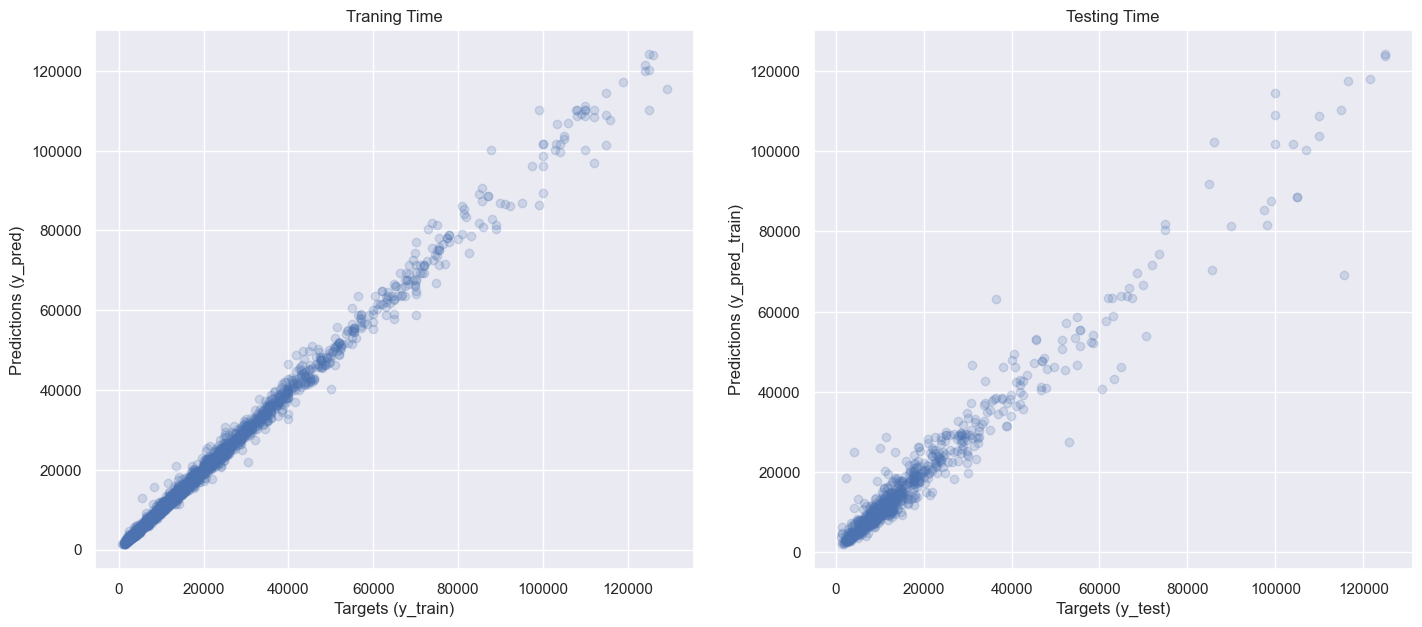

In [142]:
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

In [143]:
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9943864280822463
Testing r2_score: 0.95665943645349


model o kadar da kötü değil, ancak RandomForest LinearRegression'dan daha iyi performans gösteriyor


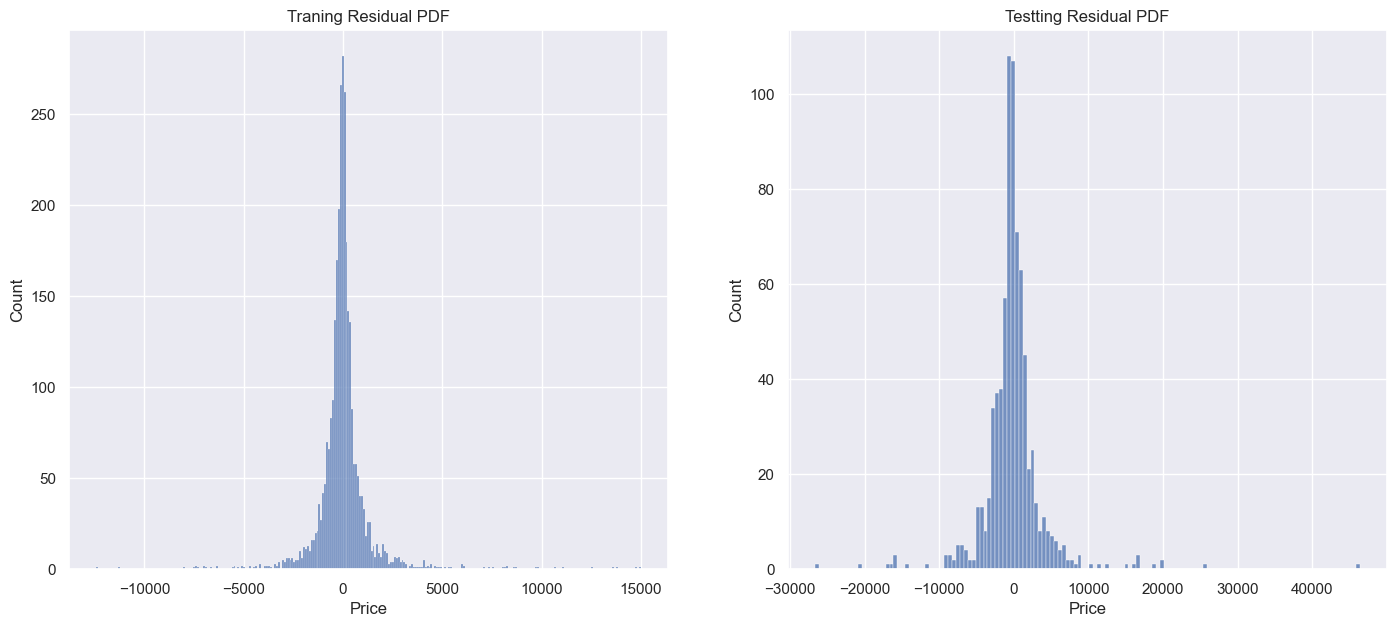

In [144]:
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residual_train);
plt.title('Traning Residual PDF');

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.histplot(residual_test);
plt.title('Testting Residual PDF');

O kadar da kötü değil ayrıca Lineer Regresyondan çok daha iyi.

Verilerin çoğu 0 üzerinde yer alıyor, çoğu durumda doğru karar veriyor.

Lineer Regresyon gibi df_eval oluşturma

In [145]:
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data
df_eval

,Prediction,Tareget,Residual,Difference%
0,18065.84,19000.00,934.16,4.92
1,5224.43,5500.00,275.57,5.01
2,25259.42,19200.00,-6059.42,31.56
3,12073.99,11900.00,-173.99,1.46
4,7700.39,7750.00,49.61,0.64
5,24951.67,13500.00,-11451.67,84.83
6,12873.03,12700.00,-173.03,1.36
7,55462.40,55555.00,92.60,0.17
8,4764.58,1500.00,-3264.58,217.64
9,11925.67,11000.00,-925.67,8.42


In [146]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,18714.72,18602.02,-112.70,17.87
std,19228.76,20139.56,4191.22,38.45
min,1923.25,1200.00,-26638.34,0.05
25%,7850.90,7500.00,-1424.14,4.48
50%,12055.21,11900.00,-276.54,10.13
75%,21952.06,20999.06,985.89,19.60
max,124127.97,125000.00,46330.22,668.95


In [ ]:
import joblib

joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']